In [2]:
import numpy as np

In [4]:
data = np.load("../Data/musicnet.npz", encoding="latin1", allow_pickle=True)

for file in data.files:
    print(file)
    print(data[file][0].shape)
    print(data[file][0])
    print(data[file][1])
    break

1788
(22631758,)
[0. 0. 0. ... 0. 0. 0.]
IntervalTree([Interval(14302, 26589, (43, 48, 1, 0.0, 'Triplet Sixteenth')), Interval(52702, 64478, (43, 48, 1, 0.16666666666666669, 'Triplet Sixteenth')), Interval(86494, 101854, (43, 48, 1, 0.33333333333333337, 'Triplet Sixteenth')), Interval(119774, 132574, (43, 48, 1, 0.5, 'Triplet Sixteenth')), Interval(161758, 176094, (43, 48, 1, 0.6666666666666666, 'Triplet Sixteenth')), Interval(161758, 302558, (42, 56, 1, 0.6666666666666666, 'Half')), Interval(194014, 208862, (43, 48, 1, 0.8333333333333333, 'Triplet Sixteenth')), Interval(228318, 241118, (43, 48, 2, 0.0, 'Triplet Sixteenth')), Interval(228318, 369630, (41, 63, 2, 0.0, 'Half')), Interval(262110, 278494, (43, 48, 2, 0.16666666666666674, 'Triplet Sixteenth')), Interval(302558, 314334, (43, 48, 2, 0.3333333333333335, 'Triplet Sixteenth')), Interval(302558, 369630, (42, 55, 2, 0.3333333333333335, 'Quarter')), Interval(302558, 526302, (41, 81, 2, 0.3333333333333335, 'Dotted Half')), Interval(

In [21]:
file = data.files[0]
X = data[file][0]
print(file)
print(len(X))

1788
22631758


In [22]:
file = data.files[0]
labels = data[file][1]
for label in labels:
    print(label[0])
    print(label[1])
    print(label[2][0])
    break

11907550
11917278
42


In [23]:
import pandas as pd
import os

In [24]:
instruments_set = set()
for file in os.listdir("musicnet/test_labels"):
    data = pd.read_csv("musicnet/test_labels/" + file)
    instruments_set = instruments_set.union(set(data["instrument"].unique()))

for file in os.listdir("musicnet/train_labels"):
    data = pd.read_csv("musicnet/train_labels/" + file)
    instruments_set = instruments_set.union(set(data["instrument"].unique()))
        
print(instruments_set)

{1, 69, 71, 72, 41, 42, 43, 44, 74, 7, 61}


In [25]:
instruments_mapping = {}
for i, instrument in enumerate(instruments_set):
    instruments_mapping[instrument] = i

In [26]:
instruments_mapping = {
    1: 0,
    7: 1,
    41: 2,
    42: 3,
    43: 4,
    44: 5,
    61: 6,
    69: 7,
    71: 8,
    72: 9,
    74: 10
}

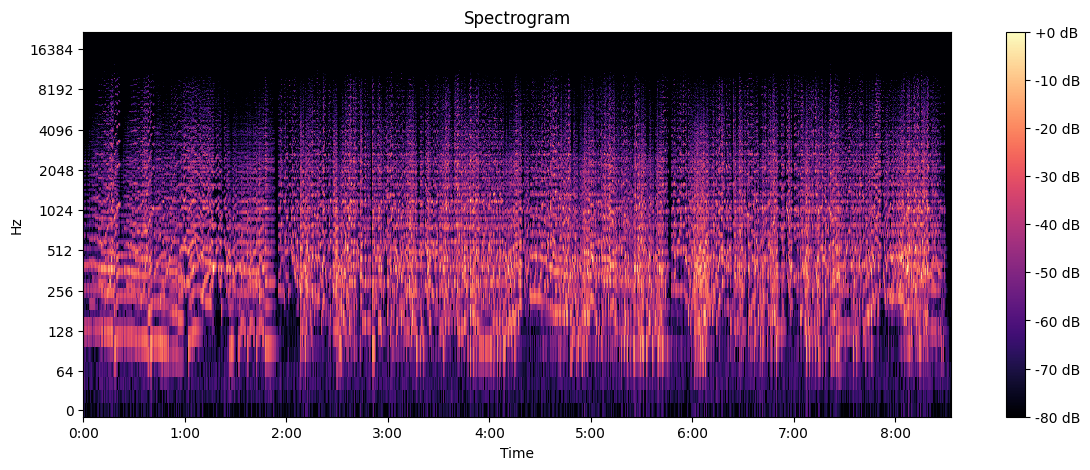

In [27]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Function to convert audio waveform to spectrogram
def audio_to_spectrogram(audio, sr, hop_length=512, n_fft=2048):
    # Compute the spectrogram
    S = np.abs(librosa.stft(audio, hop_length=hop_length, n_fft=n_fft))
    # Convert to decibel scale
    S_db = librosa.amplitude_to_db(S, ref=np.max)
    return S_db

# Example of processing a single audio file from the dataset
def process_single_file(file_id, data):
    audio_data = data[file_id][0]  # Raw audio waveform
    sr = 44100  # Sample rate of the MusicNet dataset is 44.1 kHz

    # Convert the raw audio to a spectrogram
    S_db = audio_to_spectrogram(audio_data, sr)

    # Plot the spectrogram
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.show()

    return S_db


npz_file_path = "musicnet.npz"
data = np.load(npz_file_path, allow_pickle=True, encoding="latin1")

file_id = '1788' if '1788' in data.files else data.files[0]  # Use the first file if '1788' is not available
spectrogram = process_single_file(file_id, data)

In [1]:
from Data.preprocessing import DataPreprocessor

preprocessor = DataPreprocessor(transform_type='fft', file_path="../Data/musicnet.npz", metadata_path="../Data/musicnet_metadata.csv")
X, y = preprocessor.load_data()

Loading file 1 of 10
Loading file 2 of 10
Loading file 3 of 10
Loading file 4 of 10
Loading file 5 of 10
Loading file 6 of 10
Loading file 7 of 10
Loading file 8 of 10
Loading file 9 of 10
Loading file 10 of 10


In [2]:
import numpy as np

In [3]:
print(X[0].shape)

(2048, 44187)


In [4]:
print(y.shape)

(10,)


In [5]:
print(y[0].shape)

(99, 44187)


In [14]:
max_value = -np.inf
for i in range(len(X)):
    max_value = max(max_value, np.max(X[i]))
print(max_value)

3.527374267578125
